In [2]:
import beyourself
import pandas as pd
import numpy as np
import os

In [3]:
csv_list=[]
label_list=[]
for root,dirs,files in os.walk('Data'):
    for file in files:
        if 'inlab_feat_win2.5_str1.25_set2_4classes' in file:
            csv_list.append(os.path.join(root,file))
        if 'inlab_label_win2.5_str1.25_set2_2classes_feedingdrinking_vs_others' in file:
            label_list.append(os.path.join(root,file))

In [41]:
data=pd.read_csv(csv_list[0],header=None)
data=data.as_matrix()
label=pd.read_csv(label_list[0],header=None)
label=(label.as_matrix()).reshape((-1,))
data[:,-1]=label

In [43]:
data_list=[]
for (csv_name,label_name) in zip(csv_list,label_list):
    data=(pd.read_csv(csv_name,header=None)).as_matrix()
    label=pd.read_csv(label_name,header=None)
    data[:,-1]=(label.as_matrix()).reshape((-1,))
    data_list.append(data)

In [52]:
data,label=np.concatenate(data_list)[:,:-1],np.concatenate(data_list)[:,-1]

In [4]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30,n_iter=1000)
data_tsne=tsne.fit_transform(data)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

NameError: name 'data' is not defined

In [76]:
df=pd.DataFrame(data_tsne)
df=df.rename(columns = {0:'x-tsne'})
df=df.rename(columns = {1:'y-tsne'})
df['label']=label

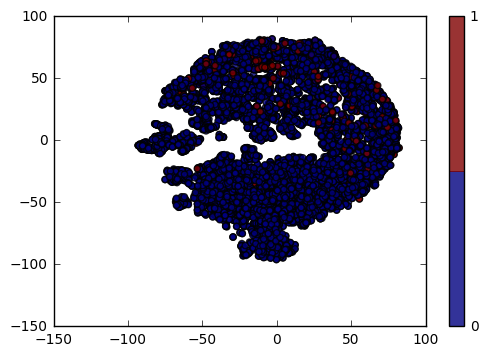

In [82]:
from matplotlib import pyplot as plt
plt.scatter(data_tsne[:,0], data_tsne[:,1], c=label,alpha=0.8, cmap=plt.cm.get_cmap("jet", 2))
plt.colorbar(ticks=range(2))
plt.show()

In [83]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=30,n_iter=1000)
data_tsne=tsne.fit_transform(data)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10240 samples in 0.071s...
[t-SNE] Computed neighbors for 10240 samples in 4.613s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10240
[t-SNE] Computed conditional probabilities for sample 2000 / 10240
[t-SNE] Computed conditional probabilities for sample 3000 / 10240
[t-SNE] Computed conditional probabilities for sample 4000 / 10240
[t-SNE] Computed conditional probabilities for sample 5000 / 10240
[t-SNE] Computed conditional probabilities for sample 6000 / 10240
[t-SNE] Computed conditional probabilities for sample 7000 / 10240
[t-SNE] Computed conditional probabilities for sample 8000 / 10240
[t-SNE] Computed conditional probabilities for sample 9000 / 10240
[t-SNE] Computed conditional probabilities for sample 10000 / 10240
[t-SNE] Computed conditional probabilities for sample 10240 / 10240
[t-SNE] Mean sigma: 3.012927
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.601158
[t-SNE] Err

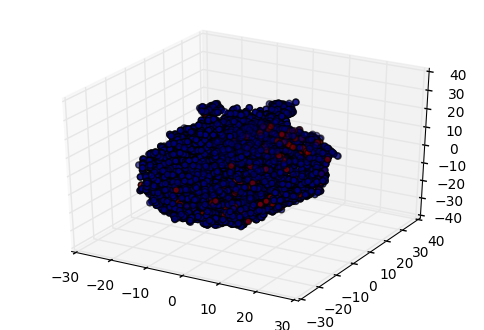

In [90]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tsne[:,0], data_tsne[:,1],data_tsne[:,2], c=label)
#plt.colorbar(ticks=range(2))
plt.show()

In [100]:
fd_folder='Groundtruthsegmentation_all/fd/fd_groundtruthsegmentation.csv'
dd_folder='Groundtruthsegmentation_all/dd/dd_groundtruthsegmentation.csv'
sd_folder='Groundtruthsegmentation_all/sd/sd_groundtruthsegmentation.csv'
cd_folder='Groundtruthsegmentation_all/cd/cd_groundtruthsegmentation.csv'

fd,dd=pd.read_csv(fd_folder),pd.read_csv(dd_folder)
sd,cd=pd.read_csv(sd_folder),pd.read_csv(cd_folder)

fd_dd=pd.concat([fd,dd])
sd_cd=pd.concat([sd,cd])
fd_dd['label']=1
sd_cd['label']=0
together=pd.concat([fd_dd,sd_cd])

In [115]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30,n_iter=1000)
data_tsne=tsne.fit_transform(together.values[:,:-1])
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1302 samples in 0.009s...
[t-SNE] Computed neighbors for 1302 samples in 0.216s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1302
[t-SNE] Computed conditional probabilities for sample 1302 / 1302
[t-SNE] Mean sigma: 531.000235
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.399879
[t-SNE] Error after 1000 iterations: 0.338737
t-SNE done! Time elapsed: 33.393792390823364 seconds


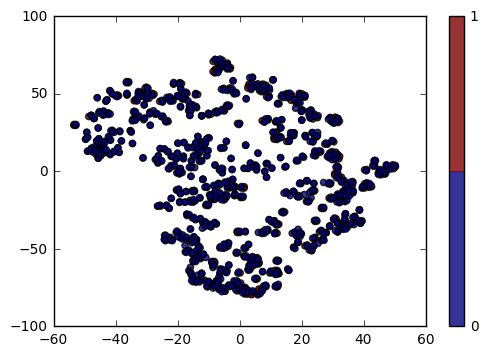

In [117]:
plt.scatter(data_tsne[:,0], data_tsne[:,1], c=together.values[:,-1],alpha=0.8, cmap=plt.cm.get_cmap("jet", 2))
plt.colorbar(ticks=range(2))
plt.show()

In [118]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=30,n_iter=1000)
data_tsne=tsne.fit_transform(together.values[:,:-1])
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1302 samples in 0.007s...
[t-SNE] Computed neighbors for 1302 samples in 0.201s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1302
[t-SNE] Computed conditional probabilities for sample 1302 / 1302
[t-SNE] Mean sigma: 531.000235
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.869720
[t-SNE] Error after 1000 iterations: 0.187021
t-SNE done! Time elapsed: 48.60724139213562 seconds


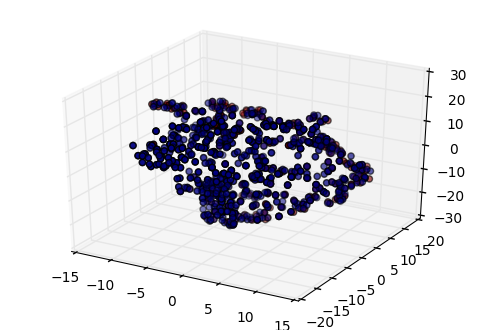

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tsne[:,0], data_tsne[:,1],data_tsne[:,2], c=together.values[:,-1])
#plt.colorbar(ticks=range(2))
plt.show()